In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
df = pd.read_csv("churn_dataset.csv")

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [6]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [7]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [10]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [11]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [13]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.shape

(7043, 21)

In [51]:
df = df.drop([df.index[488],df.index[752],df.index[933],df.index[1076],df.index[1330],df.index[3316],df.index[3805],df.index[4352],df.index[5128],df.index[5173],df.index[6615],df.index[6688]])
#df = df.drop([df.index[488],df.index[752],df.index[933],df.index[1076],df.index[1330],df.index[3316],df.index[3805],df.index[4352],df.index[5128],df.index[5173],df.index[6615],df.index[6688]])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [52]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [64]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

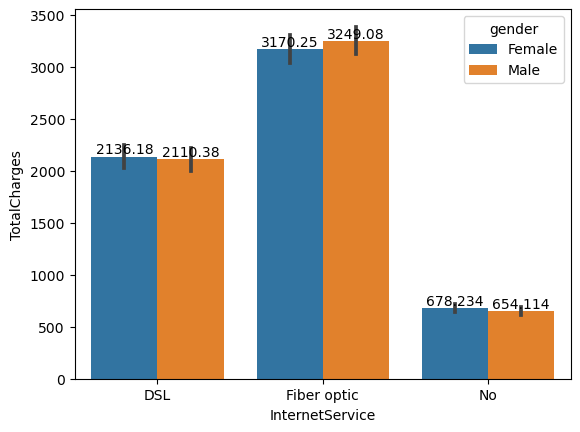

In [57]:
ax= sns.barplot(x='InternetService',y = 'TotalCharges',hue = 'gender',data = df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

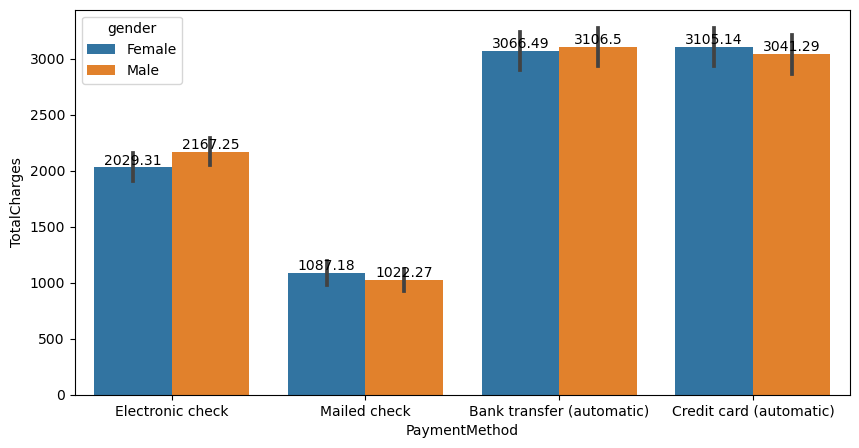

In [58]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x='PaymentMethod',y = 'TotalCharges',hue = 'gender',data = df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

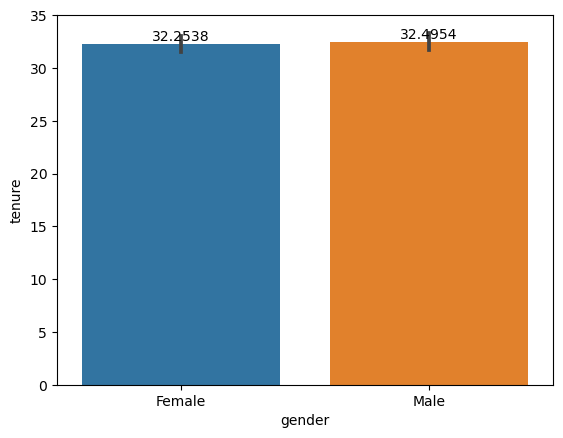

In [59]:
ax = sns.barplot(x='gender',y='tenure',data = df1)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Train-Test Split

In [77]:
y = df['Churn']
X = df[['gender','SeniorCitizen','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','MonthlyCharges','TotalCharges']]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [79]:
X_train.head(1)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
5507,Female,0,28,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Electronic check,59.9,1654.7


In [80]:
X_train.shape

(4875, 16)

In [124]:
X_test.shape

(2090, 16)

### Separating the categorical and numerical columns

In [125]:
X_train_cat = X_train[['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

In [126]:
X_train_cat.head(1)

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5507,Female,Yes,No,DSL,Yes,Yes,No,Yes,No,No


In [127]:
X_train_num = X_train.select_dtypes(include = ['int64','float64'])

In [128]:
X_train_num.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5507,0,28,59.9,1654.7


In [129]:
X_train_cat_le = X_train[['Contract','PaymentMethod']]

In [130]:
X_train_cat_le.head(1)

,Contract,PaymentMethod
5507,One year,Electronic check


In [131]:
X_test_cat = X_test[['gender','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

In [132]:
X_test_cat.head(1)

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5471,Female,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [133]:
X_test_num = X_test.select_dtypes(include = ['int64','float64'])

In [134]:
X_test_num.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5471,0,29,74.2,1993.25


In [135]:
X_test_cat_le = X_test[['Contract','PaymentMethod']]

In [136]:
X_test_cat_le.head(1)

,Contract,PaymentMethod
5471,Month-to-month,Electronic check


### Scaling the numerical

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescale = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)
X_train_rescale.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5507,-0.438432,-0.184952,-0.154626,-0.278547


In [138]:
X_test_rescale = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)
X_test_rescale.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5471,-0.438432,-0.144141,0.3178,-0.129586


### One-Hot Encoding

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse = False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),columns = encoder.get_feature_names_out(X_train_cat.columns),index = X_train_cat.index)
X_train_cat_ohe.head(1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
5507,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),columns = encoder.get_feature_names_out(X_test_cat.columns),index = X_test_cat.index)
X_test_cat_ohe.head(1)

,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
5471,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Encoding

In [141]:
X_train_cat_le['Contract'].unique()

array(['One year', 'Two year', 'Month-to-month'], dtype=object)

In [142]:
contract = {'Month-to-month':0,'One year':1,'Two year':2}

In [143]:
X_train_cat_le['Contract'] = X_train_cat_le['Contract'].apply(lambda x: contract[x])
X_train_cat_le.head(1)

C:\Users\nites\AppData\Local\Temp\ipykernel_8648\4139191080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['Contract'] = X_train_cat_le['Contract'].apply(lambda x: contract[x])


,Contract,PaymentMethod
5507,1,Electronic check


In [144]:
X_train_cat_le['PaymentMethod'].unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [145]:
pm = {'Electronic check':1,'Mailed check':2,'Credit card (automatic)':3,'Bank transfer (automatic)':4}

In [146]:
X_train_cat_le['PaymentMethod'] = X_train_cat_le['PaymentMethod'].apply(lambda x:pm[x])
X_train_cat_le.head(1)

C:\Users\nites\AppData\Local\Temp\ipykernel_8648\928851979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_le['PaymentMethod'] = X_train_cat_le['PaymentMethod'].apply(lambda x:pm[x])


,Contract,PaymentMethod
5507,1,1


In [147]:
X_test_cat_le['Contract'] = X_test_cat_le['Contract'].apply(lambda x: contract[x])
X_test_cat_le.head(1)

C:\Users\nites\AppData\Local\Temp\ipykernel_8648\2727549960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['Contract'] = X_test_cat_le['Contract'].apply(lambda x: contract[x])


,Contract,PaymentMethod
5471,0,Electronic check


In [148]:
X_test_cat_le['PaymentMethod'] = X_test_cat_le['PaymentMethod'].apply(lambda x:pm[x])
X_test_cat_le.head(1)

C:\Users\nites\AppData\Local\Temp\ipykernel_8648\2800146463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_le['PaymentMethod'] = X_test_cat_le['PaymentMethod'].apply(lambda x:pm[x])


,Contract,PaymentMethod
5471,0,1


### Concating the Scaling,Hot encoding and label encoding

In [149]:
X_train_transformed = pd.concat([X_train_rescale,X_train_cat_ohe,X_train_cat_le],axis = 1)

In [150]:
X_train_transformed.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract,PaymentMethod
5507,-0.438432,-0.184952,-0.154626,-0.278547,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
2637,-0.438432,0.141537,-0.790585,-0.325780,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,3


In [151]:
X_test_transformed = pd.concat([X_test_rescale,X_test_cat_ohe,X_test_cat_le],axis = 1)
X_test_transformed.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract,PaymentMethod
5471,-0.438432,-0.144141,0.317800,-0.129586,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1312,-0.438432,0.631271,0.210431,0.590225,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,4


## Build a model

### model 1

In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed,y_train)

LogisticRegression()

In [157]:
y_test_predict = lr.predict(X_test_transformed)

<Axes: xlabel='Churn', ylabel='Count'>

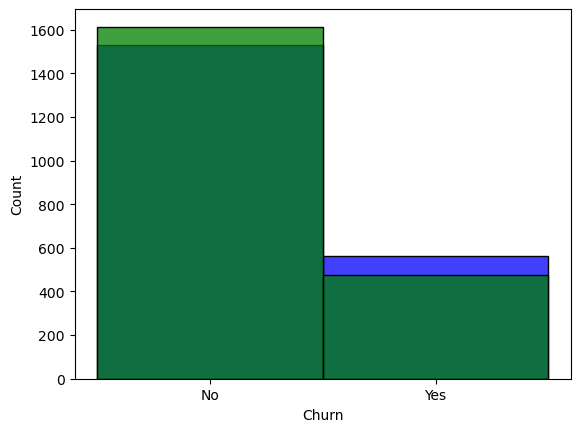

In [159]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_test_predict,color = 'green')

In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.8033492822966507

In [163]:
accuracy_score(y_test, y_test_predict, normalize=False)

1679

In [166]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_predict, pos_label='No')

0.8692332166719695

### model 2

In [167]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [169]:
y_test_predict1 = classifier.predict(X_test_transformed)
y_test_predict1

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

<Axes: xlabel='Churn', ylabel='Count'>

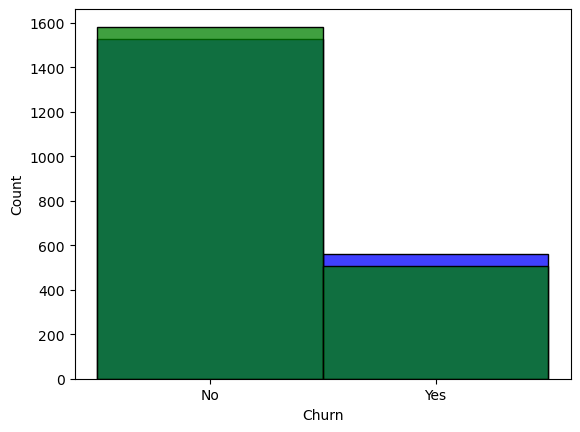

In [170]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_test_predict1,color = 'green')

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict1)

0.7717703349282297

In [172]:
accuracy_score(y_test, y_test_predict1, normalize=False)

1613

In [173]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_predict1, pos_label='No')

0.8466730954676954

### model 3

In [175]:
from sklearn.tree import DecisionTreeClassifier
dts = DecisionTreeClassifier()
dts.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [176]:
y_test_predict2 = dts.predict(X_test_transformed)

<Axes: xlabel='Churn', ylabel='Count'>

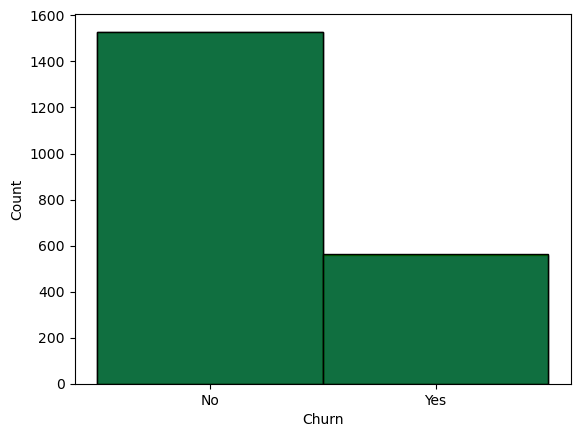

In [177]:
sns.histplot(y_test,color = 'blue')
sns.histplot(y_test_predict2,color = 'green')

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict2)

0.7315789473684211

In [179]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_predict2, pos_label='No')

0.816366612111293